# Proj 1

In [2]:
def least_squares_poly(X, y, degree):
    """
        ---PURPOSE------------------------------------

        Finds the vector of coefficients for a polynomial of varying degree and
        a set of X and y points.

        ---INPUT--------------------------------------

        X           2-D Array of shape (N,p)
        y           1-D Array of shape (N,)
        degree      Integer greater than zero

        ---OUTPUT-------------------------------------

        beta        NumPy 1-D array
        exponents   NumPy 2-D array
    """

    X = np.array(X)
    y = np.array(y)

    if x.shape[0] != y.shape[0]:
        msg = "\n\nArguments <x> and <y> in function <least_squares_poly> must be of "
        msg += f"the same shape.  \n\n\tx.shape = {x.shape}\ny.shape = {y.shape}"
        raise Exception(msg)

    if len(y.shape) != 1:
        msg = "\n\nArgument <y> in function <least_squares_poly> must be "
        msg += f"one dimensional.  \n\n\ty.shape = {y.shape}"
        raise Exception(msg)

    N = X.shape[0]
    p = X.shape[1]

    try:
        if degree == int(degree) and degree > 0:
            degree = int(degree)
        else:
            msg = "\n\nArgument <degree> in function <least_squares_poly> must be an "
            msg += f"integer greater than zero.  \ndegree = {degree}"
            raise Exception(msg)
    except ValueError:
        msg = "\n\nArgument <degree> in function <least_squares_poly> must be a "
        msg += f"number.  \n\n\ttype(degree) = {type(degree)}"
        raise Exception(msg)

    M = int(degree) + 1

    powers = np.arange(0, M, 1)
    exponents = list(permutations(powers, 2))

    for power in powers:
        exponents.append(power*np.ones(p))

    expo_sum = np.sum(exponents, axis = 1)
    valid_idx = np.where(np.less_equal(expo_sum, degree))[0]

    exponents = np.array(exponents)
    exponents = exponents[valid_idx]

    A = np.zeros((N, exponents.shape[0]))

    for n,exponent in enumerate(exponents):
        A[:,n] = np.prod(X**exponent, axis = 1)

    beta = np.linalg.inv(A.T @ A) @ A.T @ y
    return beta, exponent


# Create $\hat{x}$ and $\hat{y}$

<IPython.core.display.Javascript object>


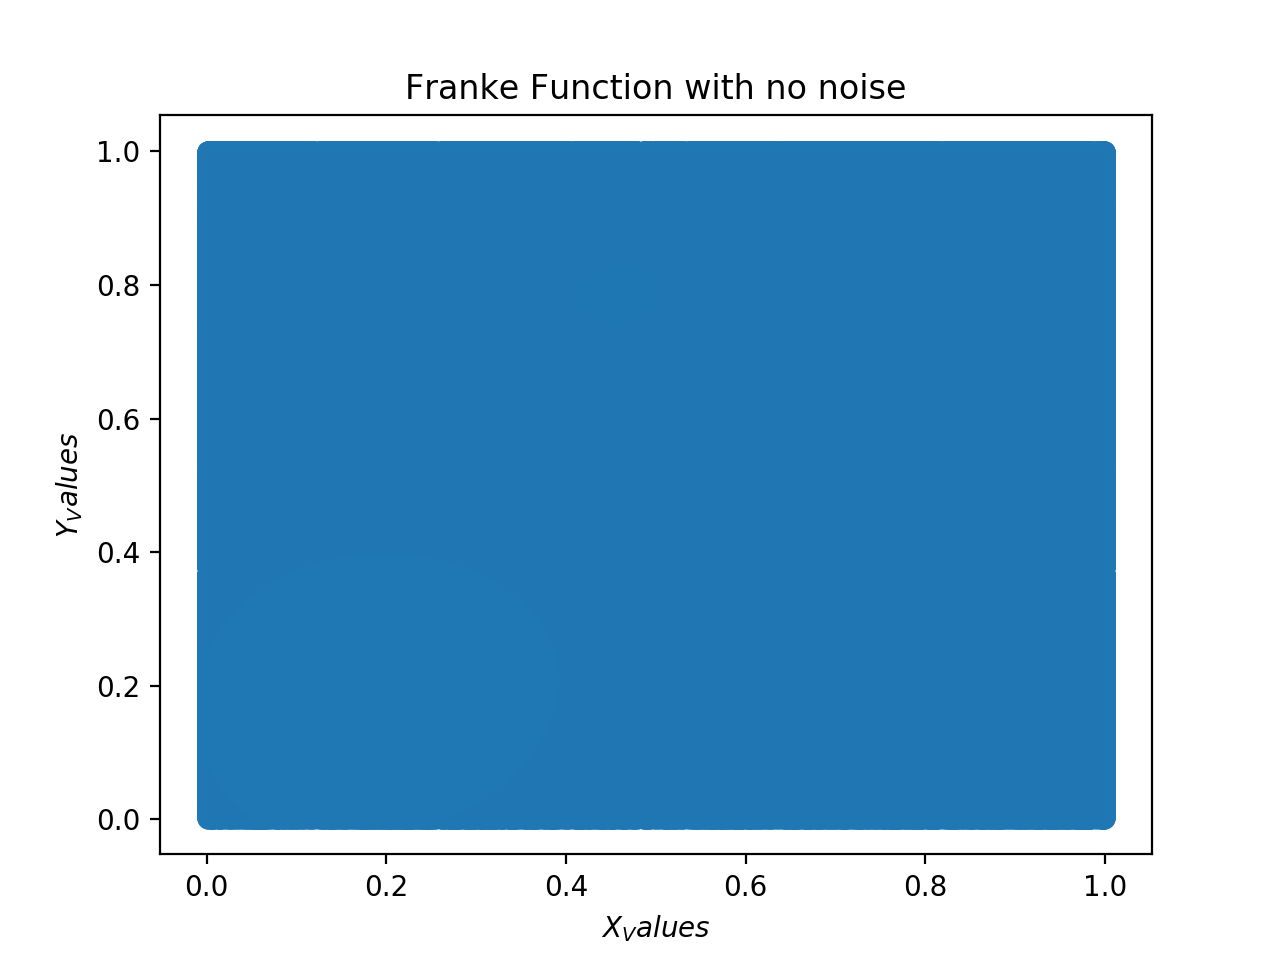

<IPython.core.display.Javascript object>


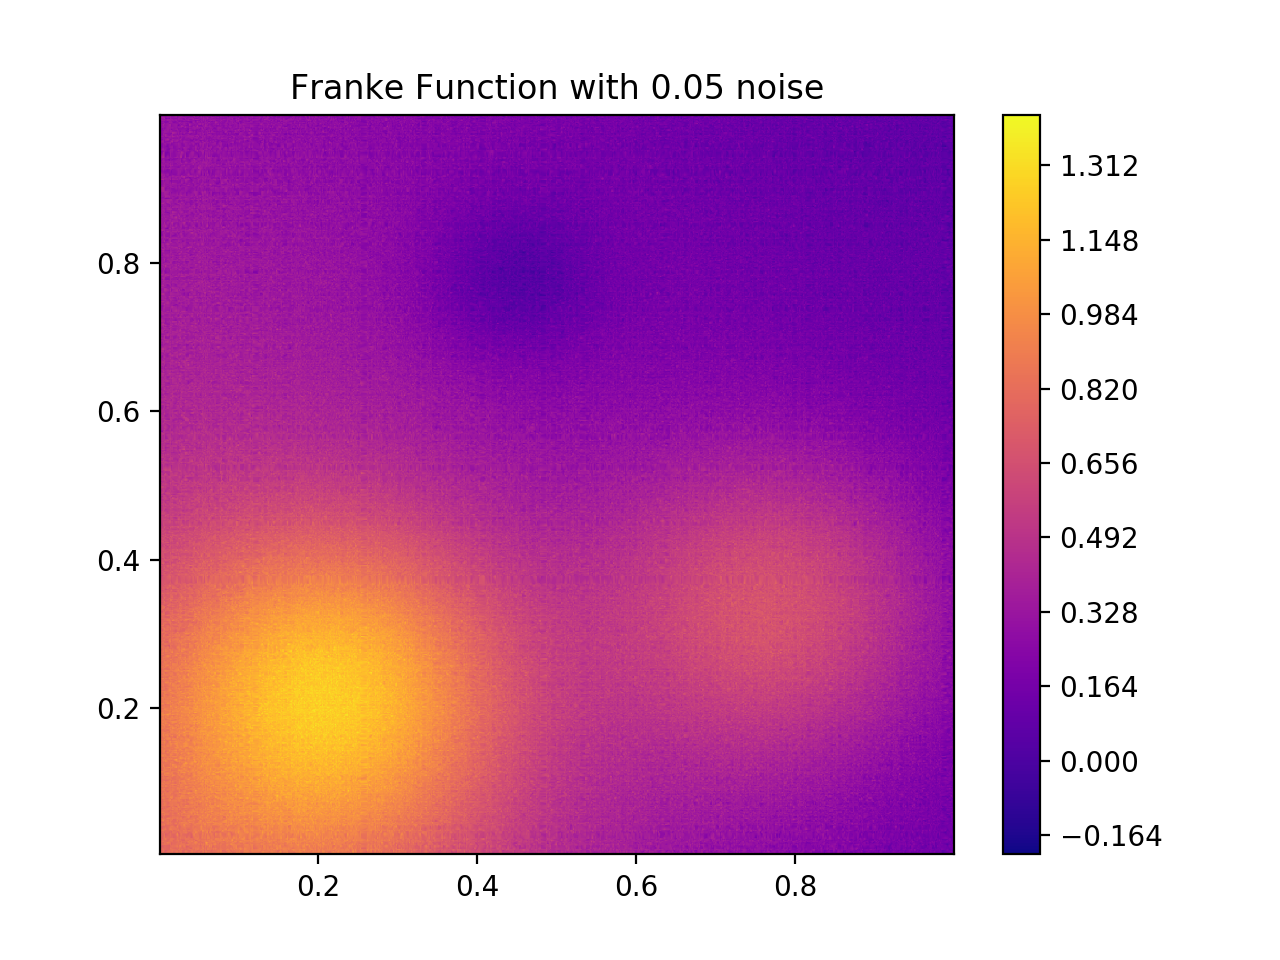

In [8]:
import itertools as it
import numpy as np
from franke import FrankeFunction
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#matrices for plotting
x_size = 1000
x = np.sort(np.random.uniform(0, 1, x_size))
y = np.sort(np.random.uniform(0, 1, x_size))
x, y = np.meshgrid(x,y)
z=FrankeFunction(x,y)

#change to vectors
noise =0.05
x_array = np.ravel(x)
y_array = np.ravel(y)
z_array= np.ravel(z)+noise*np.random.randn(len(x_array))

#make z matrix after adding noise so it can be plotted
z_with_noise = np.reshape(z_array,(x_size,x_size))


fig = plt.figure(1)

#ax = fig.gca(projection='3d')
plt.title('Franke Function with no noise')
plt.contourf(x,y,z, 1000, cmap=cm.plasma)
#surf = ax.plot_surface(x, y, z, cmap=cm.plasma, linewidth=0, antialiased=False)
#fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show()

fig2 = plt.figure(2)
plt.title('Franke Function with {} noise'.format(noise))
plt.contourf(x,y,z_with_noise, 1000, cmap=cm.plasma)
plt.colorbar()
fig.show()

#fig3 = plt.figure(3)
#plt.scatter(x, y, c=z_with_noise, s=100, edgecolor='')
#plt.show()




# create design matrix and beta vector

In [25]:
def build_design_matrix(x1_data, x2_data, order):

    exponents = list(it.product(range(0,order+1), repeat=2)) #creates tupples of all combos from 0 to order
    expo_sum = np.sum(exponents, axis = 1) 
    valid_index = np.where(np.less_equal(expo_sum, order))[0] #collects index of sum(exponents) <= order
    exponents = np.array(exponents)
    exponents = exponents[valid_index] #only take in valid exponents
    
    design_matrix = np.zeros((x1_data.shape[0], exponents.shape[0]))
    for row in range(len(exponents)):
        for i in range(x1_data.shape[0]):
            design_matrix[i,row] = (x1_data[i]**exponents[row][0])*(x2_data[i]**exponents[row][1])
    return design_matrix

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# OLS analysis

In [17]:
design_matrix = build_design_matrix(x_array, y_array, 5)
beta = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ z_array
print(beta)

[  0.30713918   4.34921886 -10.61645836  -4.67866863  26.42220118
 -15.60049099   8.84861833 -16.93950561  22.05160807 -30.66426747
  17.08557349 -38.29604816  50.06366224  -9.1786037   -5.4550084
  54.45760559 -60.0502287   11.71925341 -27.55431514  21.53402061
   2.27696496]


In [26]:
z_tilde = design_matrix @ beta
#z_tilde = np.reshape(z_tilde, (x_size,x_size))

ols_mse = MSE(z_array, z_tilde)
ols_r2 = R2(z_array, z_tilde)

print('R2 Score: ', ols_r2)
print('OLS MSE: ', ols_mse)


#fig3 = plt.figure(3)
#ax = fig.add_subplot()
#ax.set_xlabel(r'$X_Values$')
#ax.set_ylabel(r'$Y_Values$')
#ax.scatter(x,y, alpha=0.7, lw=2,
#            label='Generated Data')
#ax.plot(x,ytilde, alpha=0.7, lw=2, c='m',
#            label='Fit')
#ax.legend()
#plt.show()

R2 Score:  0.9489407388351739
OLS MSE:  0.004482302131977749
